📊 Loading temporal study results...
✅ Loaded seed 42, time point 0: Accuracy=0.722, Precision=0.708
✅ Loaded seed 42, time point 1: Accuracy=0.765, Precision=0.749
✅ Loaded seed 42, time point 2: Accuracy=0.749, Precision=0.764
✅ Loaded seed 42, time point 3: Accuracy=0.705, Precision=0.707
✅ Loaded seed 42, time point 4: Accuracy=0.699, Precision=0.713
✅ Loaded seed 42, time point 5: Accuracy=0.690, Precision=0.708
✅ Loaded seed 42, time point 6: Accuracy=0.715, Precision=0.704
✅ Loaded seed 42, time point 7: Accuracy=0.652, Precision=0.643
✅ Loaded seed 42, time point 8: Accuracy=0.796, Precision=0.863
✅ Loaded seed 42, time point 9: Accuracy=0.642, Precision=0.657
✅ Loaded seed 42, time point 10: Accuracy=0.720, Precision=0.726
✅ Loaded seed 43, time point 0: Accuracy=0.713, Precision=0.712
✅ Loaded seed 43, time point 1: Accuracy=0.756, Precision=0.781
✅ Loaded seed 43, time point 2: Accuracy=0.694, Precision=0.711
✅ Loaded seed 43, time point 3: Accuracy=0.732, Precision=0.783
✅ L

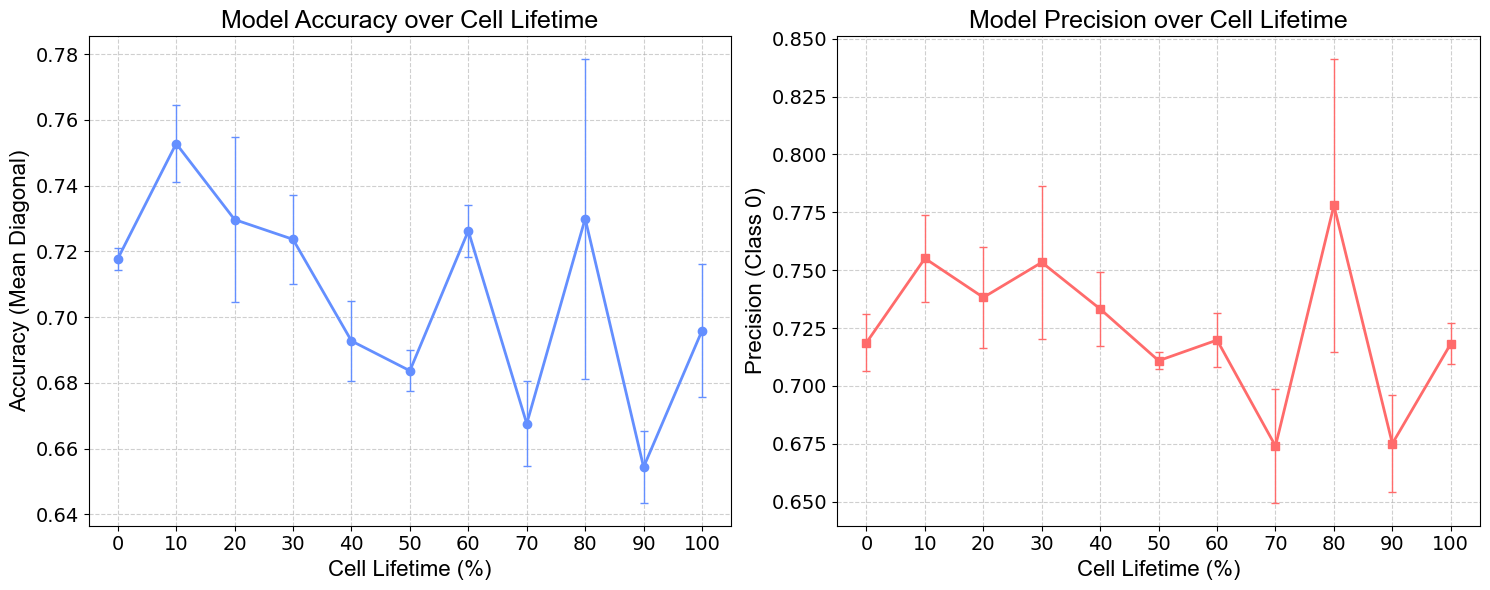


📊 Summary Statistics:
Time Point | Accuracy (Mean±Std) | Precision (Mean±Std)
------------------------------------------------------------
  0%       | 0.718±0.003     | 0.719±0.012
 10%       | 0.753±0.012     | 0.755±0.019
 20%       | 0.730±0.025     | 0.738±0.022
 30%       | 0.724±0.013     | 0.753±0.033
 40%       | 0.693±0.012     | 0.733±0.016
 50%       | 0.684±0.006     | 0.711±0.004
 60%       | 0.726±0.008     | 0.720±0.012
 70%       | 0.668±0.013     | 0.674±0.025
 80%       | 0.730±0.049     | 0.778±0.063
 90%       | 0.654±0.011     | 0.675±0.021
100%       | 0.696±0.020     | 0.718±0.009

✅ Temporal study analysis complete!


In [60]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json

# Configuration
seeds = [42, 43, 44] #43
time_points = list(range(11))  # 0 to 10 (0%, 10%, ..., 100%)
results_base_dir = "../../results"

# Storage for results
all_accuracies = []  # Shape: (seeds, time_points)
all_precisions = []  # Shape: (seeds, time_points)

print("📊 Loading temporal study results...")

# Load results for each seed and time point
for seed in seeds:
    seed_accuracies = []
    seed_precisions = []
    
    for tp in time_points:
        # Construct folder name based on your pattern
        folder_name = f"temporal_study_tps{tp}_s1_ep35_lr5_la1_seed{seed}_ldim2_s2_lr6_la4_lc1_lcon8"
        folder_path = os.path.join(results_base_dir, folder_name)
        
        # Look for confusion matrix files (they should be saved at the end of training)
        confusion_files = [f for f in os.listdir(folder_path) if f.startswith('confusion_matrix_values_epoch_') and f.endswith('.npy')]
        
        if confusion_files:
            # Get the latest confusion matrix (highest epoch number)
            latest_file = max(confusion_files, key=lambda x: int(x.split('_')[-1].split('.')[0]))
            cm_path = os.path.join(folder_path, latest_file)
            
            # Load confusion matrix
            cm = np.load(cm_path)
            
            # Calculate metrics
            mean_diagonal = np.mean(np.diag(cm))  # Accuracy
            precision = cm[0,0] / (cm[0,0] + cm[1,0]) if (cm[0,0] + cm[1,0]) > 0 else 0.0
            
            seed_accuracies.append(mean_diagonal)
            seed_precisions.append(precision)
            
            print(f"✅ Loaded seed {seed}, time point {tp}: Accuracy={mean_diagonal:.3f}, Precision={precision:.3f}")
        else:
            print(f"❌ No confusion matrix found for seed {seed}, time point {tp}")
            seed_accuracies.append(np.nan)
            seed_precisions.append(np.nan)
    
    all_accuracies.append(seed_accuracies)
    all_precisions.append(seed_precisions)

# Convert to numpy arrays
all_accuracies = np.array(all_accuracies)  # Shape: (3, 11)
all_precisions = np.array(all_precisions)  # Shape: (3, 11)

# Calculate mean and std across seeds
mean_accuracies = np.nanmean(all_accuracies, axis=0)
std_accuracies = np.nanstd(all_accuracies, axis=0)
mean_precisions = np.nanmean(all_precisions, axis=0)
std_precisions = np.nanstd(all_precisions, axis=0)

print(f"\n📈 Creating plots...")

# Create the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Convert time points to percentages for x-axis labels
time_percentages = [tp * 10 for tp in time_points]  # 0%, 10%, 20%, ..., 100%

# Plot 1: Accuracy over time
ax1.errorbar(time_percentages, mean_accuracies, yerr=std_accuracies, 
             color='#648FFF', linewidth=2, marker='o', markersize=6, 
             capsize=3, capthick=1, elinewidth=1, 
             markerfacecolor='#648FFF', markeredgecolor='#648FFF')

ax1.set_xlabel("Cell Lifetime (%)", fontsize=16, fontname="Arial")
ax1.set_ylabel("Accuracy (Mean Diagonal)", fontsize=16, fontname="Arial")
ax1.set_title("Model Accuracy over Cell Lifetime", fontsize=18, fontname="Arial")
ax1.set_xticks(time_percentages)
ax1.tick_params(axis='both', labelsize=14)
ax1.grid(True, linestyle="--", alpha=0.6)

# Plot 2: Precision over time
ax2.errorbar(time_percentages, mean_precisions, yerr=std_precisions, 
             color='#FF6B6B', linewidth=2, marker='s', markersize=6, 
             capsize=3, capthick=1, elinewidth=1, 
             markerfacecolor='#FF6B6B', markeredgecolor='#FF6B6B')

ax2.set_xlabel("Cell Lifetime (%)", fontsize=16, fontname="Arial")
ax2.set_ylabel("Precision (Class 0)", fontsize=16, fontname="Arial")
ax2.set_title("Model Precision over Cell Lifetime", fontsize=18, fontname="Arial")
ax2.set_xticks(time_percentages)
ax2.tick_params(axis='both', labelsize=14)
ax2.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n📊 Summary Statistics:")
print("=" * 60)
print("Time Point | Accuracy (Mean±Std) | Precision (Mean±Std)")
print("-" * 60)
for i, tp in enumerate(time_percentages):
    print(f"{tp:3d}%       | {mean_accuracies[i]:.3f}±{std_accuracies[i]:.3f}     | {mean_precisions[i]:.3f}±{std_precisions[i]:.3f}")

# Save results
results_summary = {
    'time_points': time_percentages,
    'mean_accuracies': mean_accuracies.tolist(),
    'std_accuracies': std_accuracies.tolist(),
    'mean_precisions': mean_precisions.tolist(),
    'std_precisions': std_precisions.tolist(),
    'all_accuracies': all_accuracies.tolist(),
    'all_precisions': all_precisions.tolist()
}

# Uncomment to save results
# np.save('temporal_study_results.npy', results_summary)
# print(f"\n💾 Results saved to temporal_study_results.npy")

print(f"\n✅ Temporal study analysis complete!")

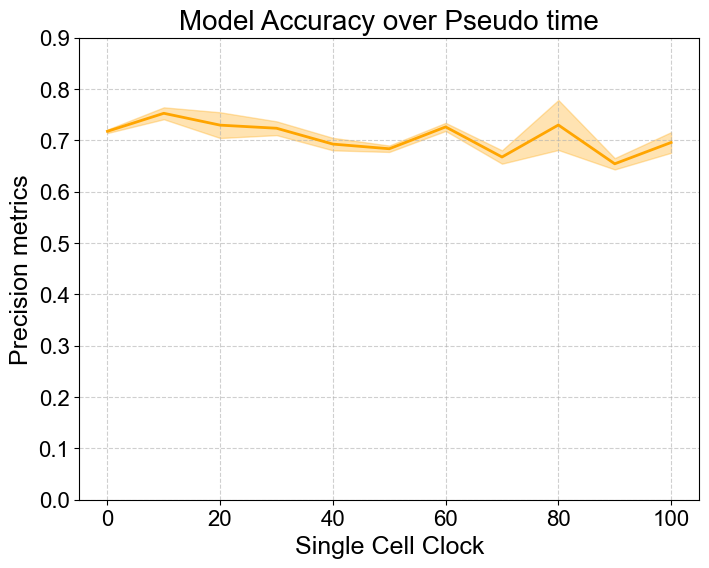

In [61]:
time_points = np.linspace(0, 100, len(mean_precisions))

# Plot
plt.figure(figsize=(8, 6))

# Precision
# plt.plot(time_points, mean_precisions, color='purple', linewidth=2, label='Precision')
# plt.fill_between(time_points, mean_precisions - std_precisions, mean_precisions + std_precisions,
#                  color='purple', alpha=0.3)

# # Accuracy (purple)
plt.plot(time_points, mean_accuracies, color='orange', linewidth=2, label='Accuracy')
plt.fill_between(time_points, mean_accuracies - std_accuracies, 
                 mean_accuracies + std_accuracies, color='orange', alpha=0.3)


# Formatting
plt.xlabel("Single Cell Clock", fontsize=18, fontname="Arial")
plt.ylabel("Precision metrics", fontsize=18, fontname="Arial")
plt.title("Model Accuracy over Pseudo time", fontsize=20, fontname="Arial")
plt.xticks(fontsize=16, fontname="Arial")
plt.yticks(fontsize=16, fontname="Arial")
plt.ylim(0.0, 0.9)  # Set y-axis range
#plt.legend(fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

# Save the figure with high quality
#plt.savefig("temporal_study.pdf", dpi=300, bbox_inches="tight")
plt.show()